In [1]:
import json
import os
import sys

root_dir = os.path.abspath(os.path.join(os.path.dirname(os.getcwd()), '.'))
sys.path.append(root_dir)

from constants import *

import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams

rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Times New Roman']
rcParams['text.usetex'] = False 


colors = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99', '#C2C2F0','#FFA07A', '#B0E0E6', '#FFD700', '#D3D3D3']
patterns = ['/', 'x', 'o', 
            '\\', '+', '.', 
            '|', '-', '*']

colors = ['#34568B',  # Royal Blue
          '#FFD700',  # Gold
          '#88CCEE',  # Light Blue
          '#DDDDDD',  # Light Gray
          '#555555',  # Dark Gray
          '#FF7F00',  # Mango Orange
          '#8B4513',  # Saddle Brown
          '#2CA02C',  # Lime Green (soft enough for color blindness)
          '#AA4499']  # Soft Purple


patterns = [None, '/', 'o', None, '\\', '.', None, '|', '*']


In [2]:
class TreeProperties:
    def __init__(self, **kwargs):
        
        self.Dimension = kwargs.get('Dimension', None)
        self.FillFactor = kwargs.get('Fill factor', None)
        self.IndexCapacity = kwargs.get('Index capacity', None)
        self.LeafCapacity = kwargs.get('Leaf capacity', None)
        self.TightMbrs = kwargs.get('Tight MBRs', None)
        self.NearMinimumOverlapFactor = kwargs.get('Near minimum overlap factor', None)
        self.ReinsertFactor = kwargs.get('Reinsert factor', None)
        self.SplitDistributionFactor = kwargs.get('Split distribution factor', None)
        self.Utilization = kwargs.get('Utilization', None)
        self.Reads = kwargs.get('Reads', None)
        self.Writes = kwargs.get('Writes', None)
        self.Hits = kwargs.get('Hits', None)
        self.Misses = kwargs.get('Misses', None)
        self.TreeHeight = kwargs.get('Tree height', None)
        self.NumberOfData = kwargs.get('Number of data', None)
        self.NumberOfNodes = kwargs.get('Number of nodes', None)
        self.Splits = kwargs.get('Splits', None)
        self.Adjustments = kwargs.get('Adjustments', None)
        self.QueryResults = kwargs.get('Query results', None)
        self.BufferHits = kwargs.get('Buffer hits', None)
        self.IndexId = kwargs.get('IndexId', None)
        self.Status = kwargs.get('Status', None)
        self.ElapsedTime = kwargs.get('Elapsed Time', None)
        self.ElapsedBuildTime = kwargs.get('Elapsed Learn Time', 0)
        self.ElapsedLearnTime = kwargs.get('Elapsed Build Time', 0)
        if not self.ElapsedTime:
            # if self.ElapsedBuildTime and self.ElapsedLearnTime:
            self.ElapsedTime = self.ElapsedBuildTime + self.ElapsedLearnTime

        self.KnnQuery = kwargs.get('knn query', None)
        self.IndexedSpace = kwargs.get('Indexed space', None)
        self.Operations = kwargs.get('Operations', None)
        self.IndexIo = kwargs.get('Index I/O', None)
        self.LeafIo = kwargs.get('Leaf I/O', None)
        
        self.QueryNum = kwargs.get('Query num', None)
        self.QueryMean = kwargs.get('Query mean', None)
        self.QueryVariance = kwargs.get('Query variance', None)
        self.QueryStdDev = kwargs.get('Query stdDev', None)
        self.QueryP50 = kwargs.get('Query p50', None)
        self.QueryP99 = kwargs.get('Query p99', None)

        self.InsertNum = kwargs.get('Insert num', None)
        self.InsertMean = kwargs.get('Insert mean', None)
        self.InsertVariance = kwargs.get('Insert variance', None)
        self.InsertStdDev = kwargs.get('Insert stdDev', None)
        self.InsertP50 = kwargs.get('Insert p50', None)
        self.InsertP99 = kwargs.get('Insert p99', None)

    def __str__(self):
        attrs = vars(self)
        return '\n'.join(f"{key}: {value}" for key, value in attrs.items())

In [3]:
def parse_rtree_properties(file_path):
    properties = {}
    with open(file_path, 'r') as file:
        for line in file:
            if ": " in line: 
                key, value = line.strip().split(": ", 1)
                
                if value.isdigit():
                    value = int(value)
                elif value.replace('.', '', 1).isdigit():
                    value = float(value)
                properties[key] = value
    return TreeProperties(**properties)

In [4]:
# baselines = ['bmtree', 'kdtree', 'ketree_greddy', 'qdtree', 'r_star_tree', 'rankspace_zorder', 'rlrtree', 'rtree', 'zorder']
build_result_path = "../result/libspatialindex/{name}/build/"
point_result_path = "../result/libspatialindex/{name}/point/"
range_result_path = "../result/libspatialindex/{name}/range/"
knn_result_path = "../result/libspatialindex/{name}/knn/"
insert_result_path = "../result/libspatialindex/{name}/insert/"
insert_point_result_path = "../result/libspatialindex/{name}/insert_point/"

baseline_suffix = {'bmtree':'_bits_20_depth_1_sample_10000', 
                   'kdtree':'',
                   'kdtree_greedy':'',
                   'qdtree':'_episode_10_sampling_ratio_0.01_action_space_200',
                   'r_star_tree':'_rstar',
                   'rankspace_zorder':'_bits_20',
                   'rlrtree':'_rlrtree_epoch_10',
                   'rtree':'_quadratic',
                   'zorder':'_bits_20'}


In [5]:
def plot_hist(datasets, baseline_names, result, y_label="", is_log=False, output_file_path=None):
    label_size = 16
    legend_size = 16
    
    fig, ax = plt.subplots(figsize=(18, 6))
    width = 0.8 / len(baseline_names)
    x = np.arange(len(datasets))
    
    group_width = len(baseline_names) * width  # 计算每组的总宽度
    spacing = 0.02  # 间隔大小
    
    for i, baseline in enumerate(baseline_names):
        # 计算偏移量
        offset = int(i / 3) * spacing
        adjusted_x = x - int(len(baseline_names) / 2) * width + i * width + offset
        ax.bar(adjusted_x, result[i], width=width, label=baseline, color=colors[i % len(colors)], hatch=patterns[i % len(patterns)])

    ax.set_ylabel(y_label, fontsize=label_size)
    ax.set_xticks(x + spacing * (len(baseline_names) // 3 - 1) / 2)  # 调整x轴刻度位置
    ax.set_xticklabels(datasets, fontsize=label_size)
    ax.tick_params(axis='x', labelsize=label_size)
    ax.tick_params(axis='y', labelsize=label_size)
    
    if is_log:
        ax.set_yscale('log')
    
    legend = ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), fontsize=legend_size, ncol=len(baseline_names))
    plt.setp(legend.get_title(), fontsize=legend_size)
    
    plt.tight_layout()
    
    if output_file_path:
        plt.savefig(output_file_path, format='pdf', bbox_inches='tight')
    
    plt.show()
    plt.close(fig)

### Read Only

#### Build

[['89%', '89%', '89%', '89%', '89%', '89%'], ['89%', '89%', '89%', '89%', '89%', '89%'], ['89%', '89%', '89%', '89%', '89%', '89%'], ['68%', '64%', '67%', '69%', '70%', '66%'], ['69%', '70%', '71%', '71%', '71%', '71%'], ['51%', '40%', '49%', '42%', '40%', '41%'], ['78%', '78%', '78%', '78%', '78%', '78%'], ['64%', '66%', '64%', '73%', '68%', '68%'], ['78%', '78%', '78%', '78%', '78%', '78%']]
[[0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [147, 154, 149, 144, 141, 151], [143, 142, 140, 140, 140, 139], [197, 246, 204, 236, 247, 245], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]]
[[0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [469, 548, 386, 499, 833, 495], [5147, 5472, 4716, 5096, 5146, 5177], [1748, 2058, 2264, 1936, 1694, 2040], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]]


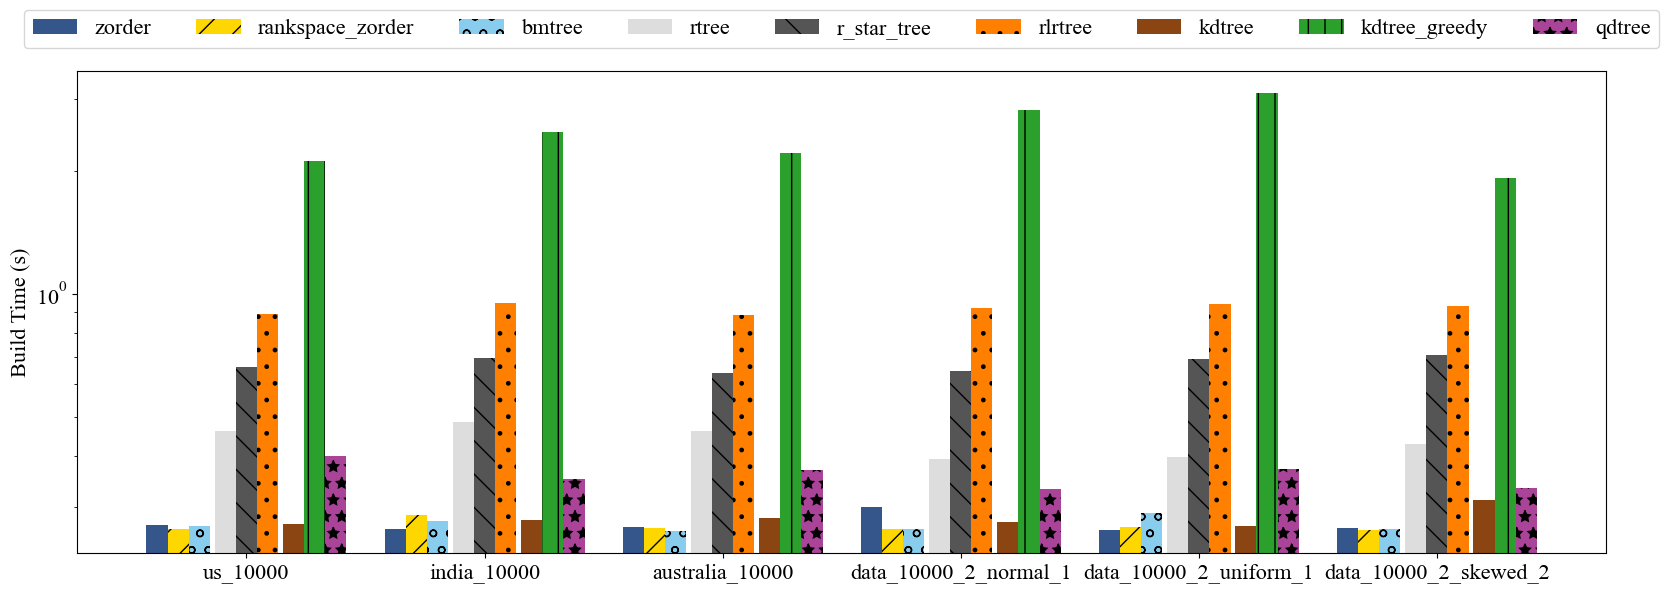

In [6]:
data_names = ["us_10000", "india_10000", "australia_10000", "data_10000_2_normal_1", "data_10000_2_uniform_1", "data_10000_2_skewed_2"]
real_default_range_name_pattern = "_{data_name}_range_1000_2_normal_1_0.001x0.001"
synthetic_default_range_name_pattern = "_range_1000_2_normal_1_0.001x0.001"
build_result_name_pattern = "{data_name}{default_range_name}{suffix}.txt"
special_baselines = ['bmtree', 'kdtree_greedy', 'rlrtree', 'qdtree']
baselines = ['zorder', 'rankspace_zorder', 'bmtree', 'rtree', 'r_star_tree', 'rlrtree', 'kdtree', 'kdtree_greedy', 'qdtree']

result = []
utilization_result = []
splits_result = []
adjustments_result = []

for baseline in baselines:
    suffix = baseline_suffix[baseline]
    dataset_results = []
    dataset_utilization_results = []
    dataset_splits_results = []
    dataset_adjustments_results = []
    for data_name in data_names:

        if data_name.startswith("data"):
            default_range_name = synthetic_default_range_name_pattern if baseline in special_baselines else ''
        else:
            default_range_name=real_default_range_name_pattern.format(data_name=data_name) if baseline in special_baselines else ''
            
        build_result_name = build_result_name_pattern.format(
            data_name=data_name,
            default_range_name=default_range_name,
            suffix=suffix
        )
        res = os.path.join(build_result_path.format(name=baseline), build_result_name)

        tree_property = parse_rtree_properties(res)
        
        # dataset_results.append({
        #     'ElapsedTime': tree_property.ElapsedTime,
        #     'ElapsedBuildTime': tree_property.ElapsedBuildTime,
        #     'ElapsedLearnTime': tree_property.ElapsedLearnTime
        # })
        dataset_results.append(float(tree_property.ElapsedTime / 1e9))
        dataset_utilization_results.append(tree_property.Utilization)
        dataset_splits_results.append(tree_property.Splits)
        dataset_adjustments_results.append(tree_property.Adjustments)

    result.append(dataset_results) 
    utilization_result.append(dataset_utilization_results) 
    splits_result.append(dataset_splits_results) 
    adjustments_result.append(dataset_adjustments_results) 

print(utilization_result)
print(splits_result)
print(adjustments_result)

plot_hist(data_names, baselines, result, y_label="Build Time (s)", is_log=True, output_file_path="../figs/exp/build.pdf")

#### Point Query

[[2000, 2000, 2000, 200, 200, 200], [2000, 2000, 2000, 200, 200, 200], [2000, 2000, 2000, 200, 200, 200], [2000, 2000, 2000, 200, 200, 200], [2000, 2000, 2000, 200, 200, 200], [2000, 2000, 2000, 200, 200, 200], [2000, 2000, 2000, 200, 200, 200], [2000, 2000, 2000, 200, 200, 200], [2000, 2000, 2000, 200, 200, 200]]


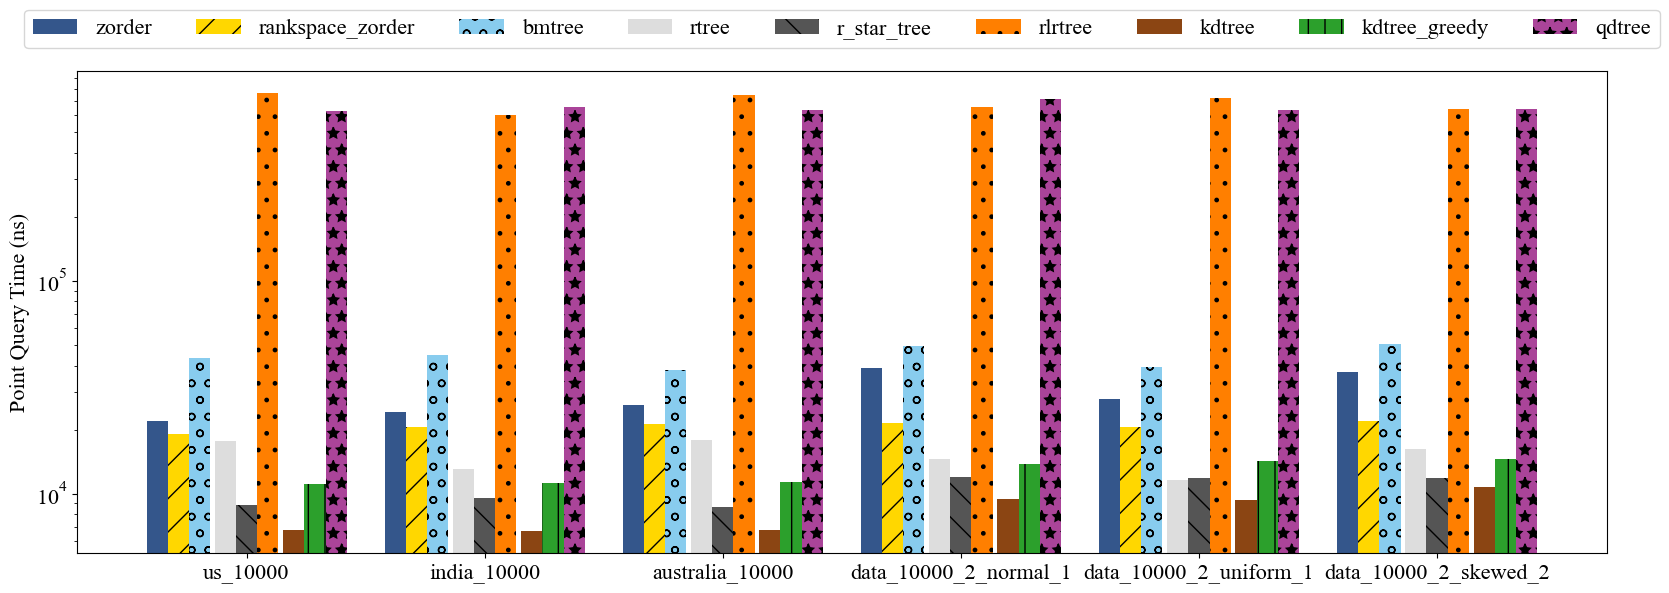

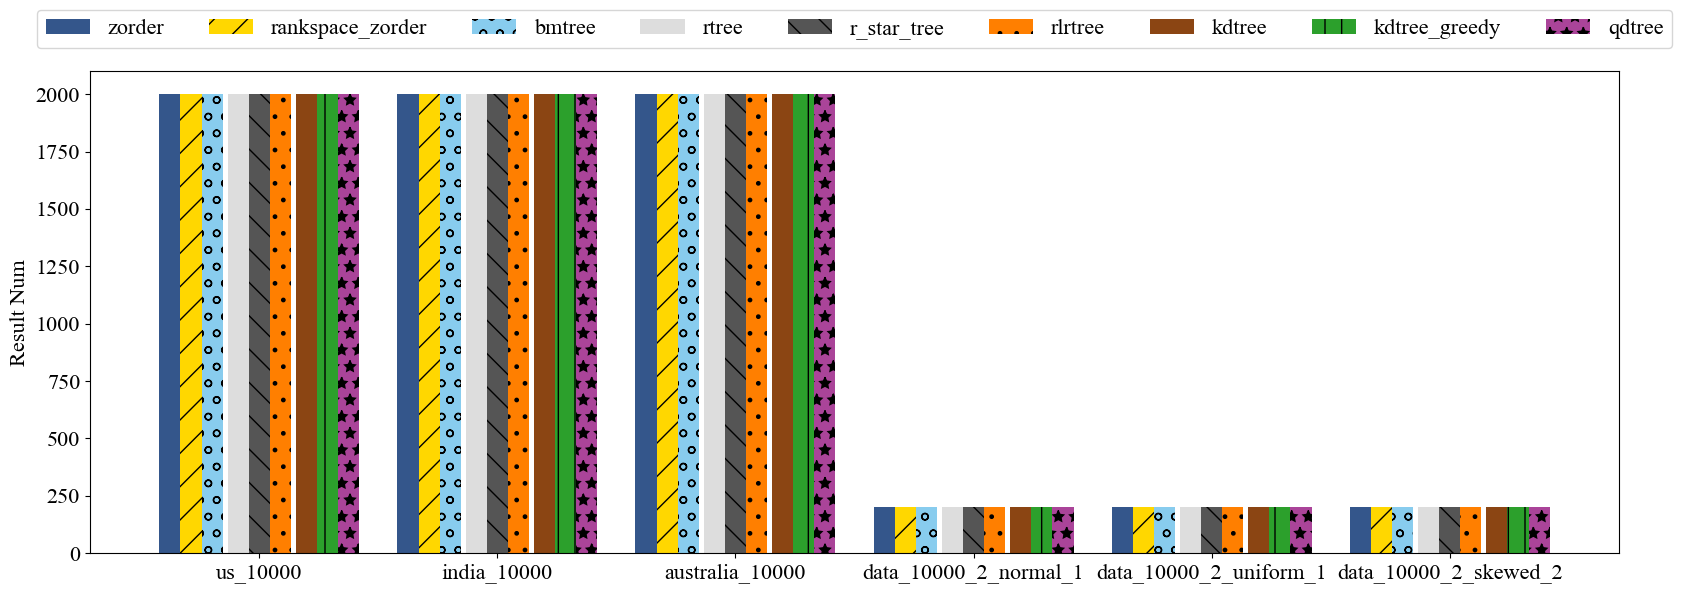

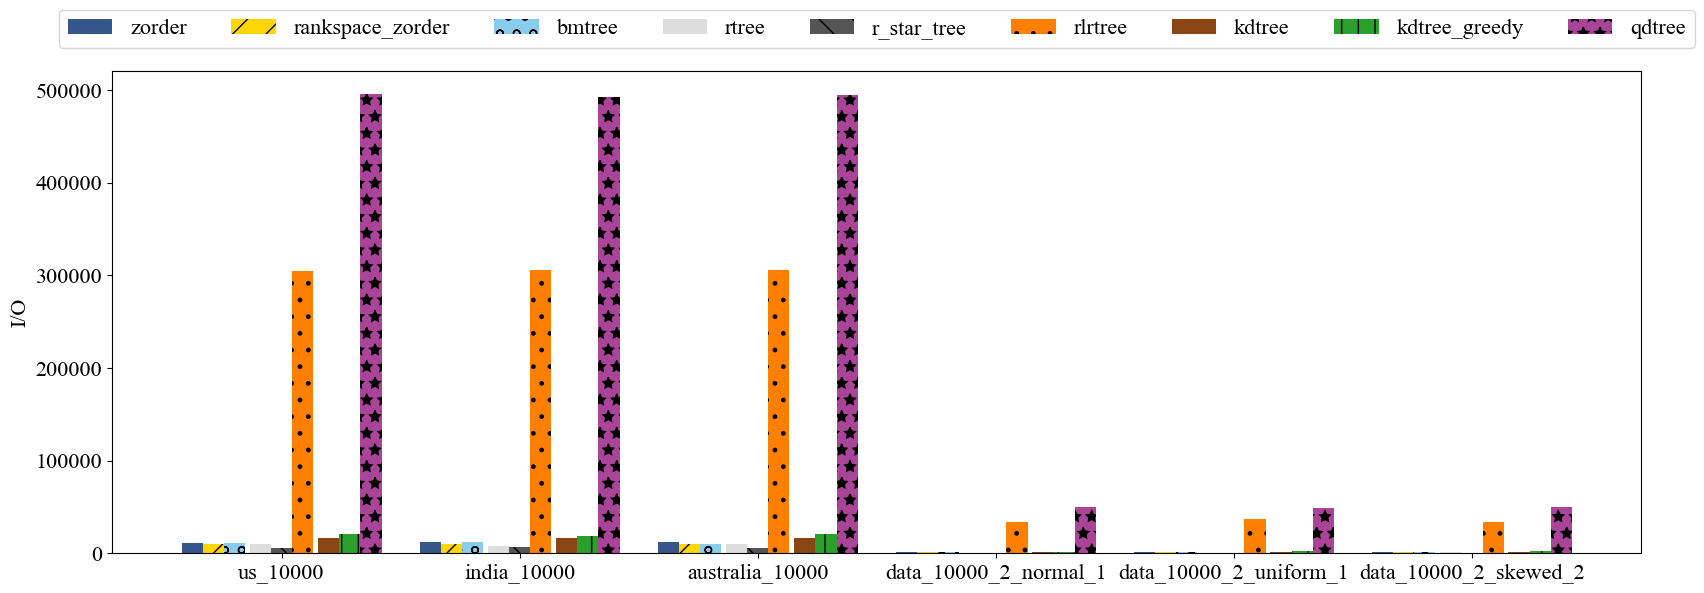

In [7]:
# 1 
# default_range_name = "_{data_name}_range_1000_2_normal_1_0.001x0.001"
real_point_name = "{data_name}_point_2000_2_normal_1"
synthetic_point_name = "point_200_{data_name}_2_normal_1"
point_result_name_pattern = "{data_name}{default_range_name}_{point_name}{suffix}.txt"
special_baselines = ['bmtree', 'kdtree_greedy', 'rlrtree', 'qdtree']

result = []
query_result_num = []
IO = []

for baseline in baselines:
    suffix = baseline_suffix[baseline]
    dataset_results = []
    dataset_result_num = []
    dataset_IO = []
    for data_name in data_names:

        if data_name.startswith("data"):
            default_range_name = synthetic_default_range_name_pattern if baseline in special_baselines else ''
            point_name = synthetic_point_name.format(data_name=data_name)
        else:
            default_range_name=real_default_range_name_pattern.format(data_name=data_name) if baseline in special_baselines else ''
            point_name = real_point_name.format(data_name=data_name)
        
        point_result_name = point_result_name_pattern.format(
            data_name=data_name,
            point_name=point_name,
            default_range_name=default_range_name,
            suffix=suffix
        )
        res = os.path.join(point_result_path.format(name=baseline), point_result_name)

        tree_property = parse_rtree_properties(res)

        # self.QueryNum = kwargs.get('Query num', None)
        # self.QueryMean = kwargs.get('Query mean', None)
        # self.QueryVariance = kwargs.get('Query variance', None)
        # self.QueryStdDev = kwargs.get('Query stdDev', None)
        # self.QueryP50 = kwargs.get('Query p50', None)
        # self.QueryP99 = kwargs.get('Query p99', None)
 
        dataset_results.append(float(tree_property.QueryMean))
        dataset_result_num.append(tree_property.QueryResults)
        dataset_IO.append(tree_property.IndexIo + tree_property.LeafIo)
    result.append(dataset_results) 
    query_result_num.append(dataset_result_num)
    IO.append(dataset_IO)

print(query_result_num)
plot_hist(data_names, baselines, result, y_label="Point Query Time (ns)", is_log=True, output_file_path="../figs/exp/point_query.pdf")
plot_hist(data_names, baselines, query_result_num, y_label="Result Num", output_file_path="../figs/exp/point_result_num.pdf")
plot_hist(data_names, baselines, IO, y_label="I/O", output_file_path="../figs/exp/point_IO.pdf")

#### Range Query

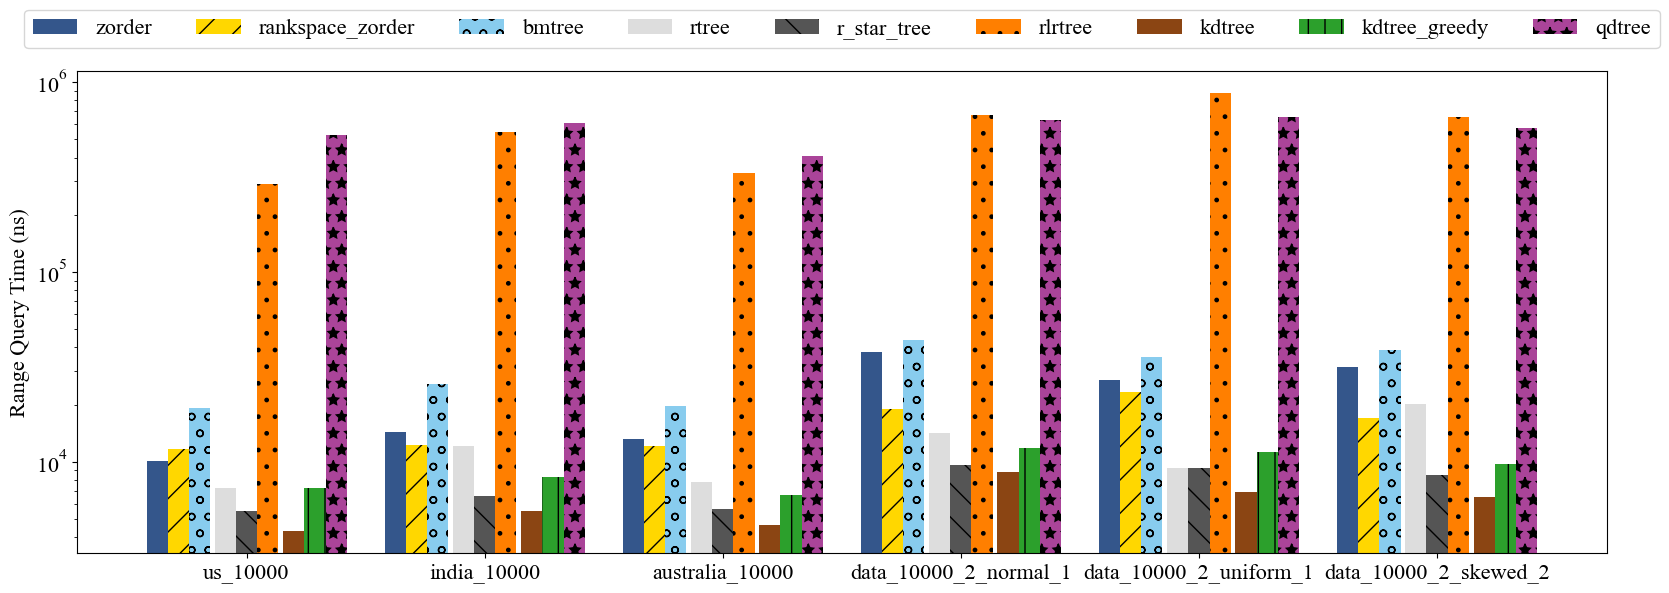

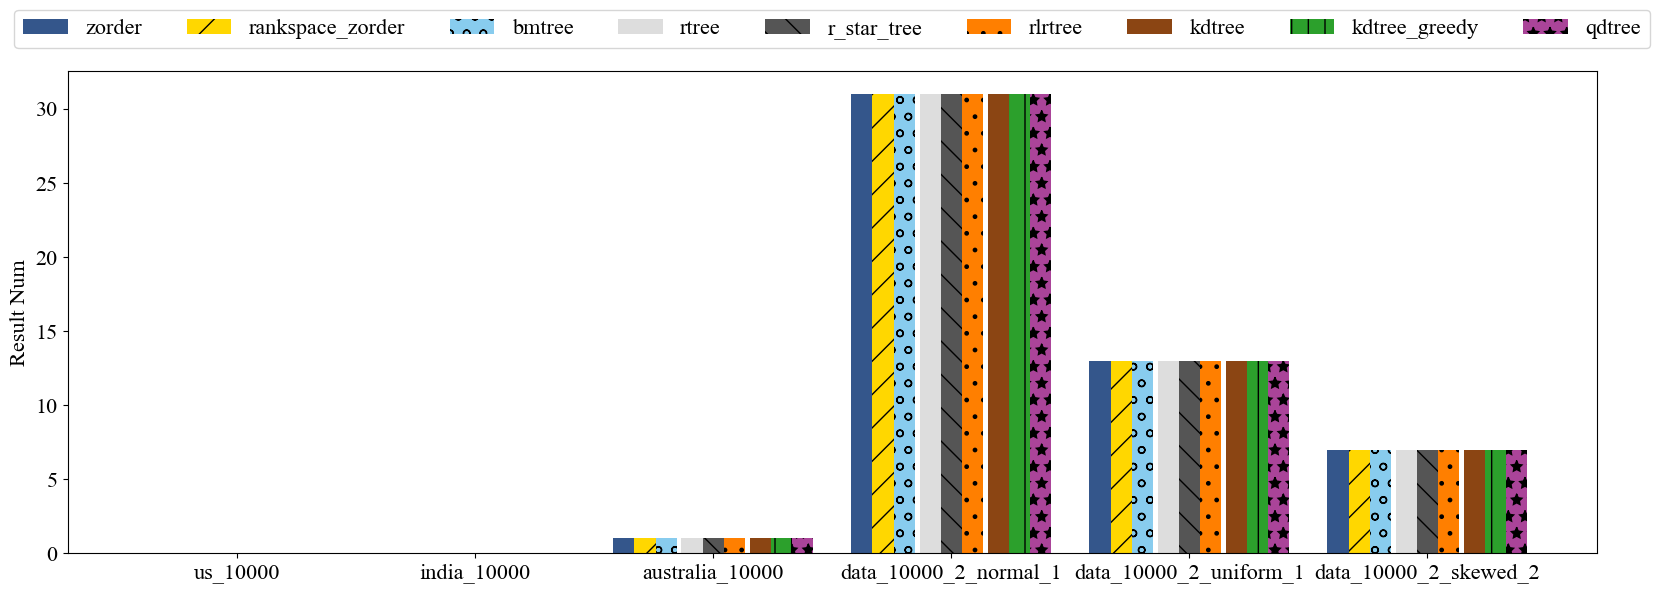

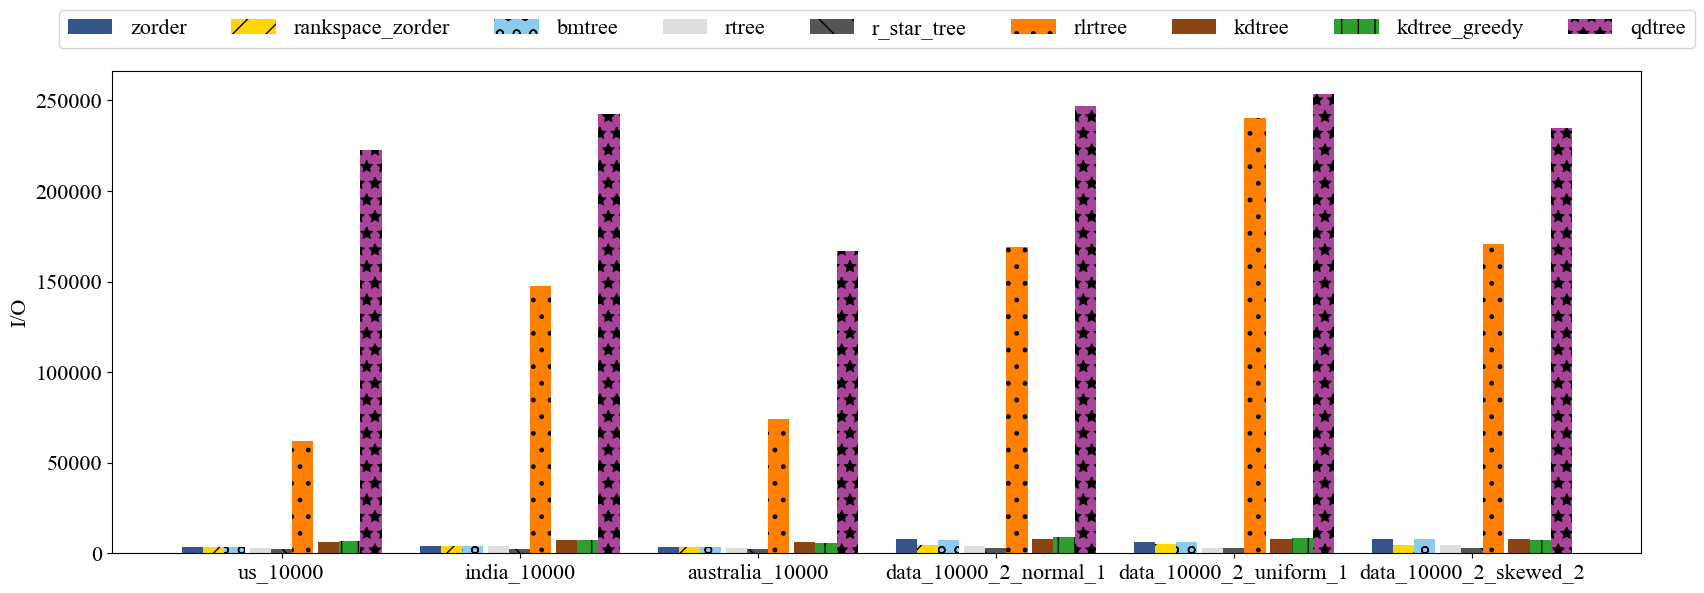

In [8]:
real_range_name_pattern = "_{data_name}_range_1000_2_normal_1_0.001x0.001"
synthetic_range_name_pattern = "_range_1000_2_normal_1_0.001x0.001"
range_result_name_pattern = "{data_name}{range_name}{suffix}.txt"
result = []
IO = []

query_result_num = []

for baseline in baselines:
    suffix = baseline_suffix[baseline]
    dataset_results = []
    dataset_result_num = []
    dataset_IO = []
    
    for data_name in data_names:

        if data_name.startswith("data"):
            range_name = synthetic_range_name_pattern
        else:
            range_name=real_range_name_pattern.format(data_name=data_name)
        
        range_result_name = range_result_name_pattern.format(
            data_name=data_name,
            range_name=range_name,
            suffix=suffix
        )
        res = os.path.join(range_result_path.format(name=baseline), range_result_name)
        
        tree_property = parse_rtree_properties(res)

        dataset_results.append(float(tree_property.QueryMean))
        dataset_result_num.append(tree_property.QueryResults)
        dataset_IO.append(tree_property.IndexIo + tree_property.LeafIo)
        
    result.append(dataset_results) 
    query_result_num.append(dataset_result_num) 
    IO.append(dataset_IO)

# plot_hist(data_names, baselines, result)
plot_hist(data_names, baselines, result, y_label="Range Query Time (ns)", is_log=True, output_file_path="../figs/exp/range_query_time.pdf")
plot_hist(data_names, baselines, query_result_num, y_label="Result Num", output_file_path="../figs/exp/range_query_result_num.pdf")
plot_hist(data_names, baselines, IO, y_label="I/O", output_file_path="../figs/exp/range_query_IO.pdf")

#### knn Query

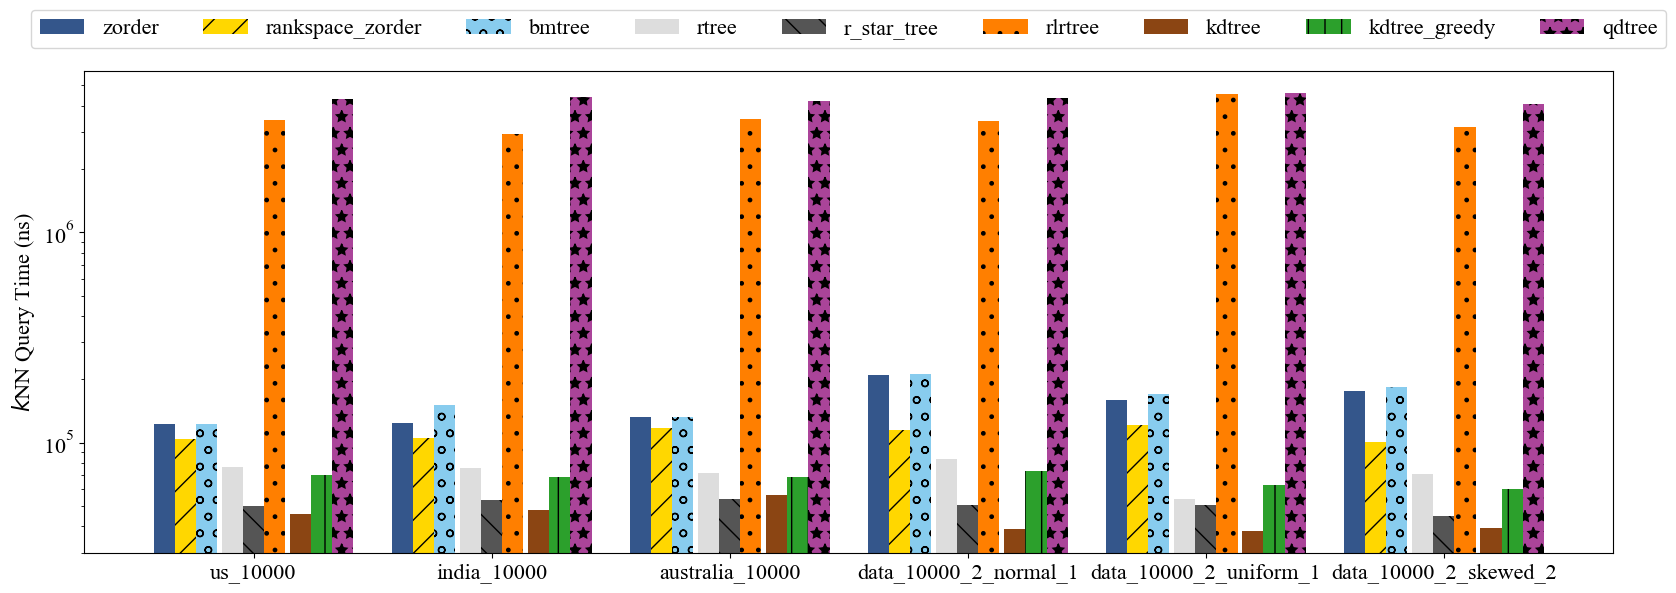

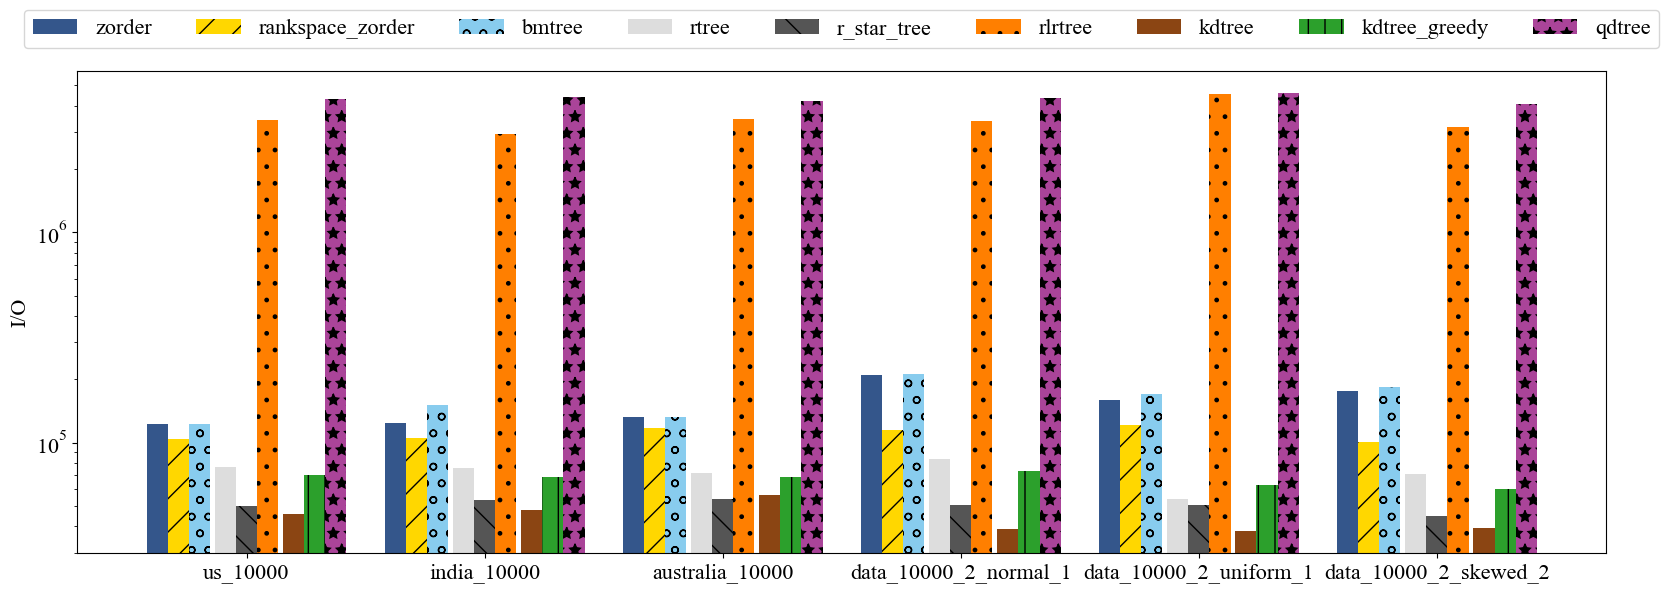

In [9]:
# 1 
data_name = "OSM_10000"
k=1
real_knn_name = "{data_name}_knn_1000_2_normal_1"
synthetic_knn_name = "knn_1000_2_normal_1"
knn_result_name_pattern = "{data_name}{default_range_name}_{knn_name}_k_{k}{suffix}.txt"
special_baselines = ['bmtree', 'kdtree_greedy', 'rlrtree', 'qdtree']

result = []

IO = []
for baseline in baselines:
    suffix = baseline_suffix[baseline]
    dataset_results = []
    dataset_IO = []
    for data_name in data_names:

        if data_name.startswith("data"):
            default_range_name = synthetic_default_range_name_pattern if baseline in special_baselines else ''
            knn_name = synthetic_knn_name
        else:
            default_range_name=real_default_range_name_pattern.format(data_name=data_name) if baseline in special_baselines else ''
            knn_name = real_knn_name.format(data_name=data_name)
        
        knn_result_name = knn_result_name_pattern.format(
            data_name=data_name,
            knn_name=knn_name,
            default_range_name=default_range_name.format(data_name=data_name) if baseline in special_baselines else '',
            suffix=suffix,
            k=k
        )
        res = os.path.join(knn_result_path.format(name=baseline), knn_result_name)
        
        tree_property = parse_rtree_properties(res)

        dataset_results.append(float(tree_property.QueryMean))
        dataset_IO.append(tree_property.IndexIo + tree_property.LeafIo)
    result.append(dataset_results) 
    IO.append(dataset_IO) 

plot_hist(data_names, baselines, result, y_label="$k$NN Query Time (ns)", is_log=True, output_file_path="../figs/exp/knn_query_time.pdf")
plot_hist(data_names, baselines, result, y_label="I/O", is_log=True, output_file_path="../figs/exp/knn_query_IO.pdf")


### Write only

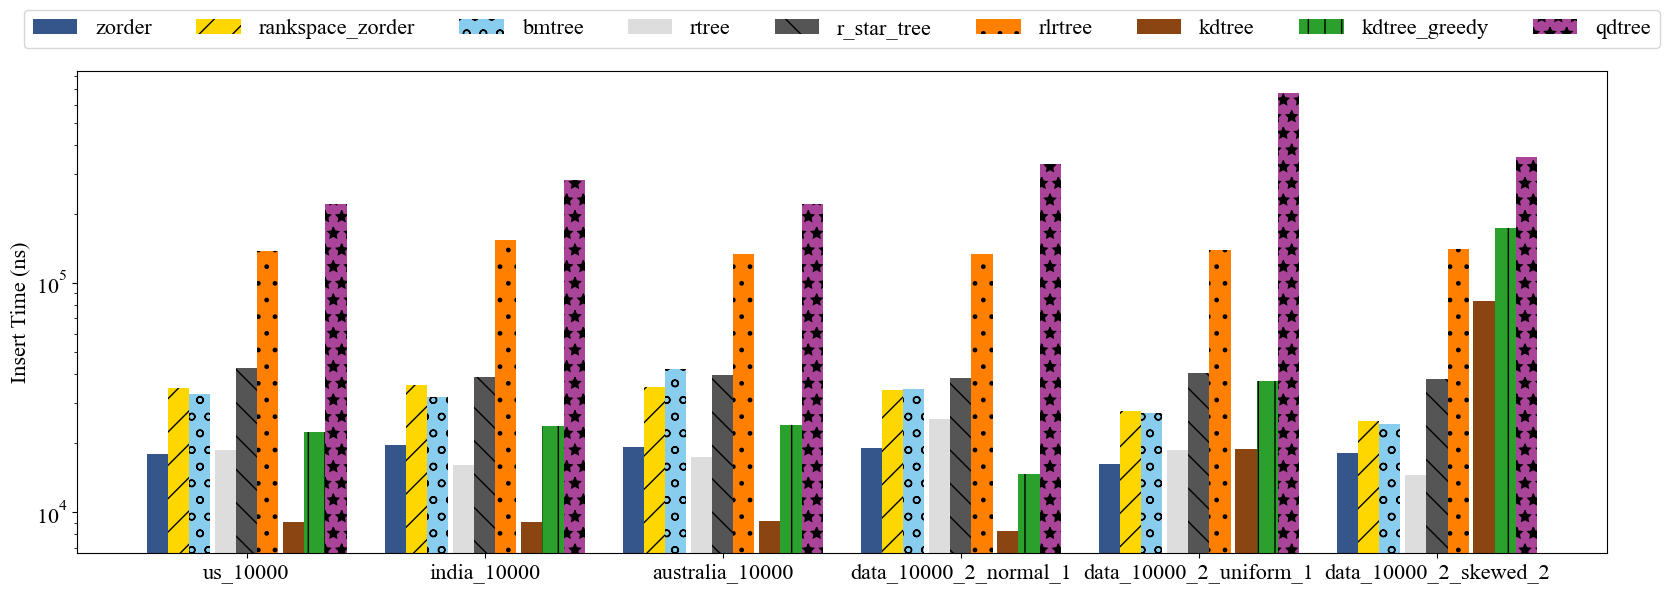

In [10]:
# 1 
data_name = "OSM_10000"
default_range_name = "_{data_name}_range_1000_2_normal_1_0.001x0.001"
synthetic_insert_name = "insert_1000_2_normal_1"
real_insert_name = "{data_name}_insert_1000_2_normal_1"
insert_result_name_pattern = "{data_name}{default_range_name}_{insert_name}{suffix}.txt"
special_baselines = ['bmtree', 'kdtree_greedy', 'rlrtree', 'qdtree']
result = []

for baseline in baselines:
    suffix = baseline_suffix[baseline]
    dataset_results = []
    for data_name in data_names:        

        if data_name.startswith("data"):
            insert_name = synthetic_insert_name
            default_range_name = synthetic_default_range_name_pattern if baseline in special_baselines else ''
        else:
            insert_name=real_insert_name.format(data_name=data_name) 
            default_range_name=real_default_range_name_pattern.format(data_name=data_name) if baseline in special_baselines else ''
        
        insert_result_name = insert_result_name_pattern.format(
            data_name=data_name,
            insert_name=insert_name,
            default_range_name=default_range_name,
            suffix=suffix
        )
        res = os.path.join(insert_result_path.format(name=baseline), insert_result_name)
        
        tree_property = parse_rtree_properties(res)

        dataset_results.append(float(tree_property.InsertMean))
    result.append(dataset_results) 

plot_hist(data_names, baselines, result, y_label="Insert Time (ns)", is_log=True, output_file_path="../figs/exp/write_only.pdf")


### Balanced

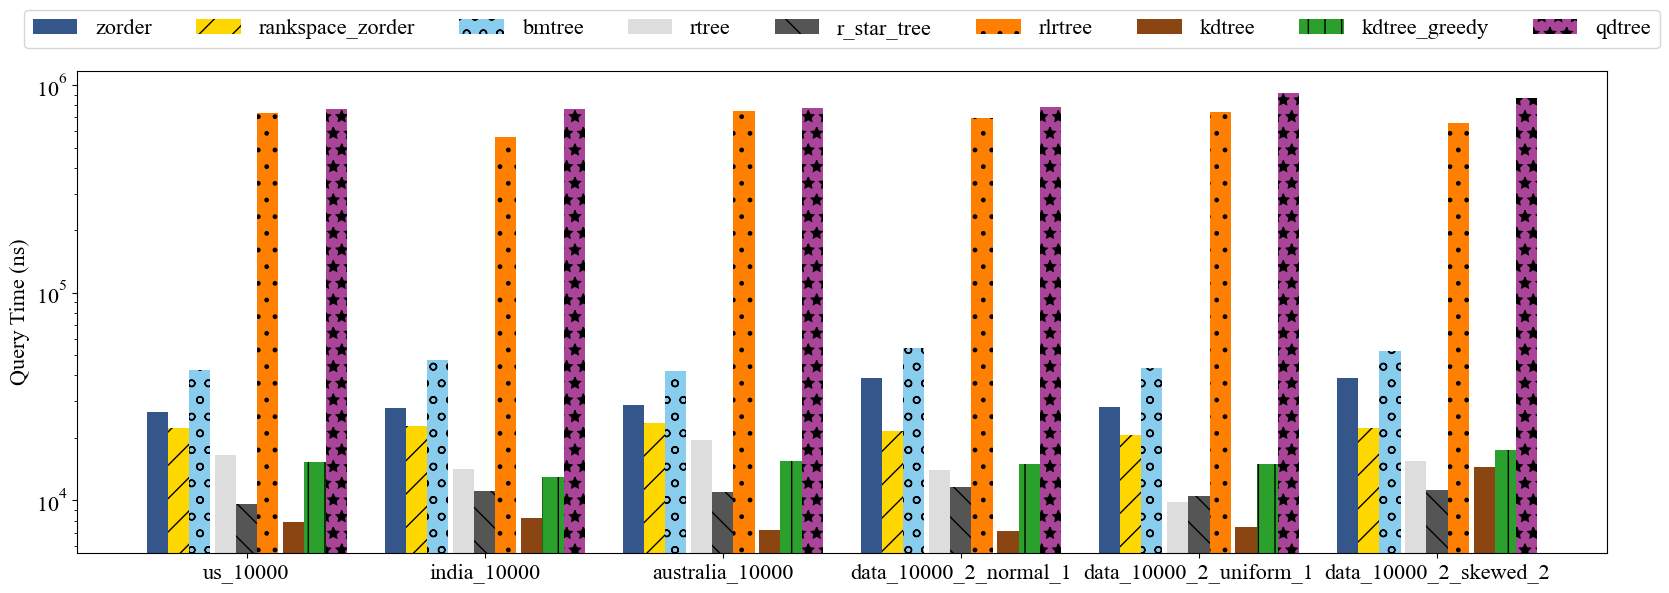

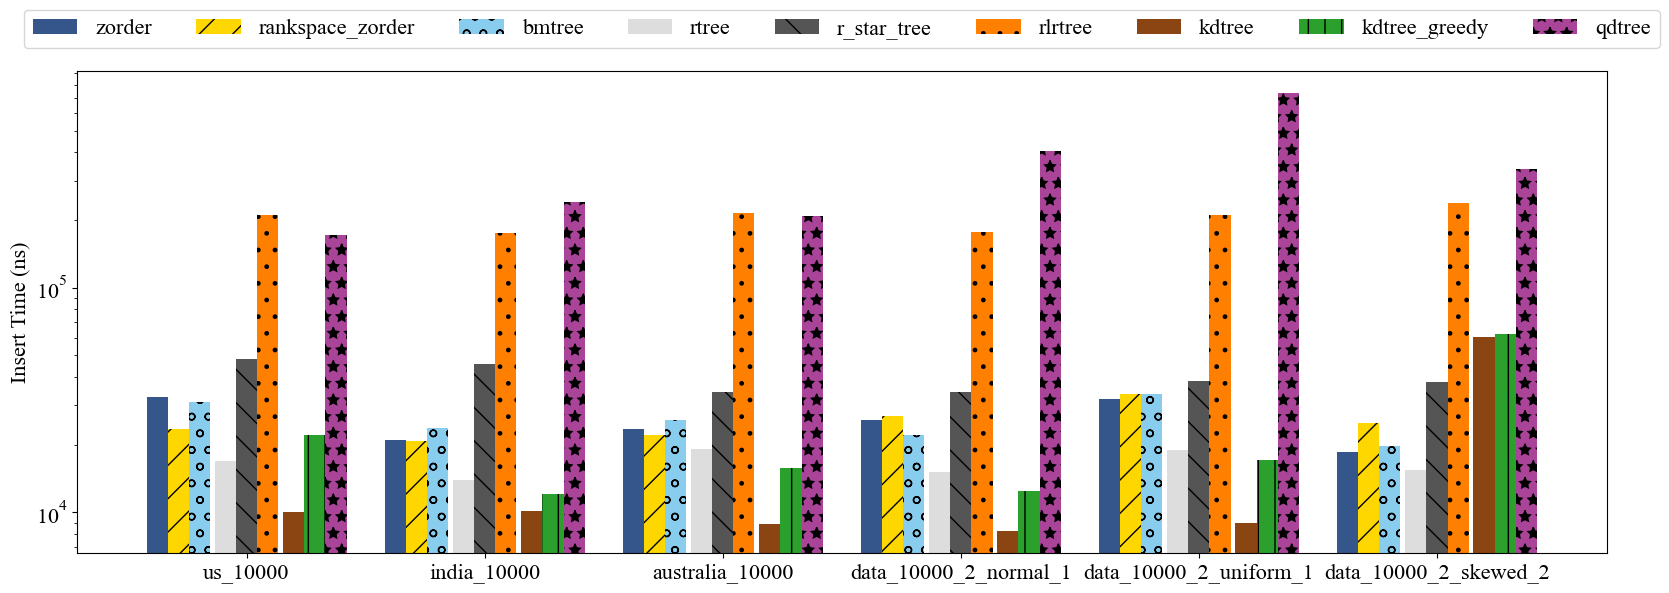

In [11]:
# 1 
data_name = "OSM_10000"
default_range_name = "_{data_name}_range_1000_2_normal_1_0.001x0.001_2_normal_1"
synthetic_insert_point_name = "insert_point_1000_{data_name}_2_normal_1"
real_insert_point_name = "{data_name}_insert_point_1000_2_normal_1"
insert_point_result_name_pattern = "{data_name}{default_range_name}_{insert_point_name}_10_10{suffix}.txt"
special_baselines = ['bmtree', 'kdtree_greedy', 'rlrtree', 'qdtree']


insert_result = []
query_result = []

for baseline in baselines:
    suffix = baseline_suffix[baseline]
    dataset_query_results = []
    dataset_insert_results = []
    for data_name in data_names:  

        if data_name.startswith("data"):
            insert_point_name = synthetic_insert_point_name.format(data_name=data_name) 
            default_range_name = synthetic_default_range_name_pattern if baseline in special_baselines else ''
        else:
            insert_point_name=real_insert_point_name.format(data_name=data_name) 
            default_range_name=real_default_range_name_pattern.format(data_name=data_name) if baseline in special_baselines else ''
        
            
        insert_point_result_name = insert_point_result_name_pattern.format(
            data_name=data_name,
            insert_point_name=insert_point_name,
            default_range_name=default_range_name,
            suffix=suffix
        )
        res = os.path.join(insert_point_result_path.format(name=baseline), insert_point_result_name)
        tree_property = parse_rtree_properties(res)

        dataset_query_results.append(float(tree_property.QueryMean))
        dataset_insert_results.append(float(tree_property.InsertMean))
    query_result.append(dataset_query_results) 
    insert_result.append(dataset_insert_results) 

plot_hist(data_names, baselines, query_result, y_label="Query Time (ns)", is_log=True, output_file_path="../figs/exp/balanced_query_time.pdf")
plot_hist(data_names, baselines, insert_result, y_label="Insert Time (ns)", is_log=True, output_file_path="../figs/exp/balanced_insert_time.pdf")



### Write heavy

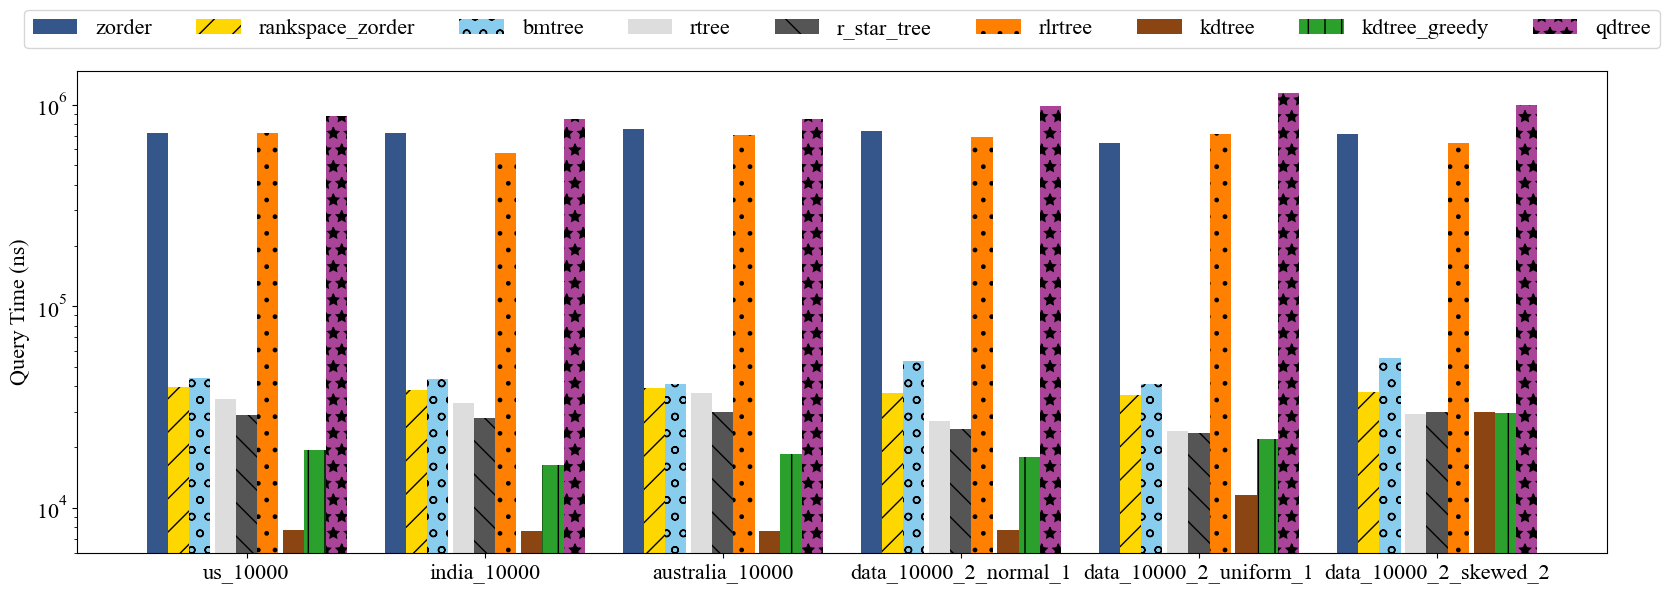

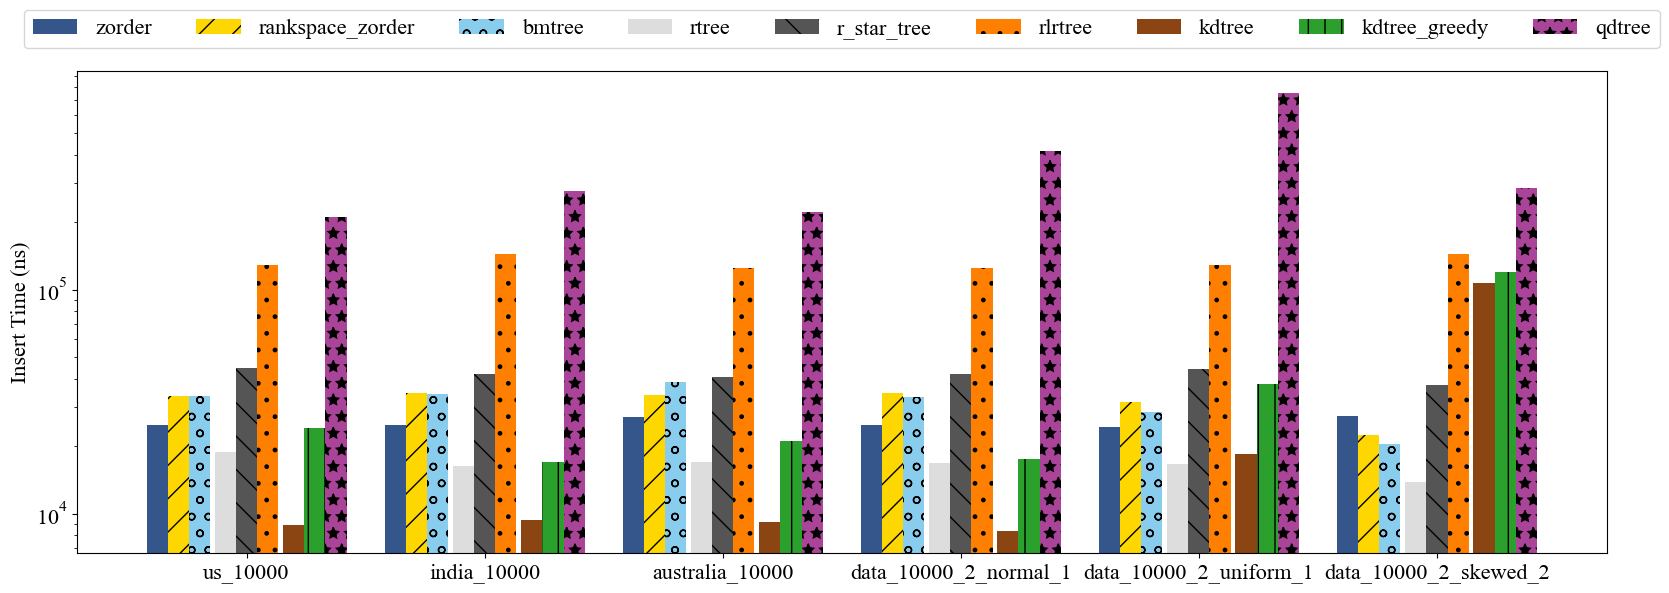

In [12]:
# 1 
insert_point_result_name_pattern = "{data_name}{default_range_name}_{insert_point_name}_18_2{suffix}.txt"
special_baselines = ['bmtree', 'kdtree_greedy', 'rlrtree', 'qdtree']

insert_result = []
query_result = []

for baseline in baselines:
    suffix = baseline_suffix[baseline]
    dataset_query_results = []
    dataset_insert_results = []
    for data_name in data_names:  
            
        if data_name.startswith("data"):
            insert_point_name = synthetic_insert_point_name.format(data_name=data_name) 
            default_range_name = synthetic_default_range_name_pattern if baseline in special_baselines else ''
        else:
            insert_point_name=real_insert_point_name.format(data_name=data_name) 
            default_range_name=real_default_range_name_pattern.format(data_name=data_name) if baseline in special_baselines else ''
        
            
        insert_point_result_name = insert_point_result_name_pattern.format(
            data_name=data_name,
            insert_point_name=insert_point_name,
            default_range_name=default_range_name,
            suffix=suffix
        )
        res = os.path.join(insert_point_result_path.format(name=baseline), insert_point_result_name)
        tree_property = parse_rtree_properties(res)

        dataset_query_results.append(float(tree_property.QueryMean))
        dataset_insert_results.append(float(tree_property.InsertMean))
    query_result.append(dataset_query_results) 
    insert_result.append(dataset_insert_results) 

plot_hist(data_names, baselines, query_result, y_label="Query Time (ns)", is_log=True, output_file_path="../figs/exp/write_heavy_query_time.pdf")
plot_hist(data_names, baselines, insert_result, y_label="Insert Time (ns)", is_log=True, output_file_path="../figs/exp/write_heavy_insert_time.pdf")


### Read heavy

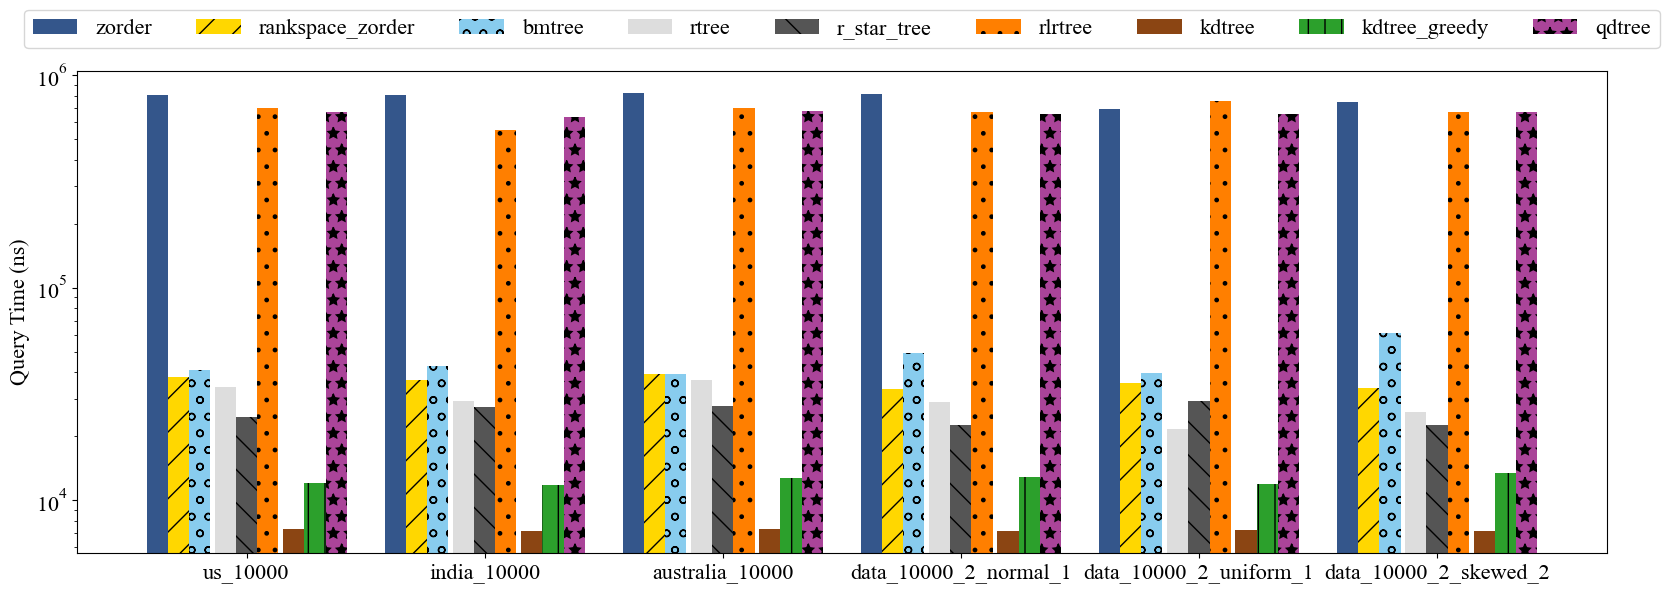

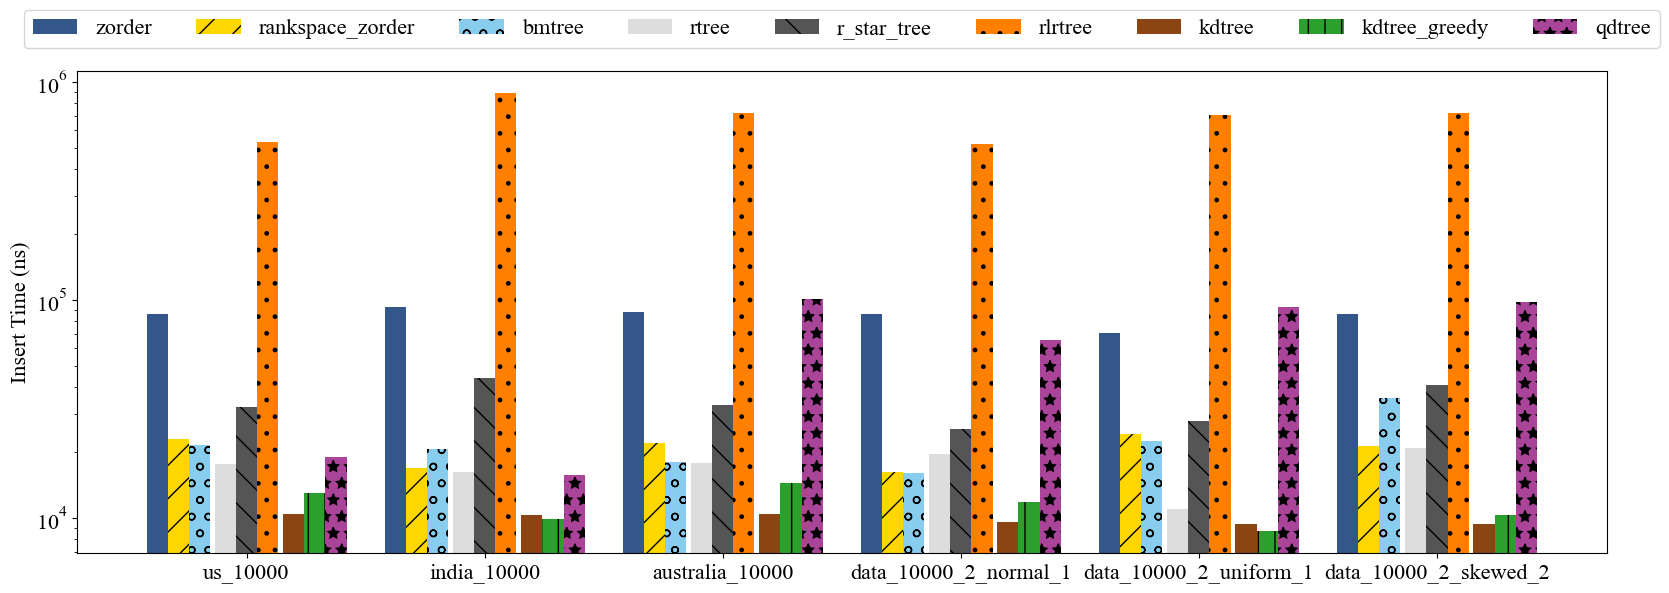

In [13]:
# 1 
insert_point_result_name_pattern = "{data_name}{default_range_name}_{insert_point_name}_2_18{suffix}.txt"
special_baselines = ['bmtree', 'kdtree_greedy', 'rlrtree', 'qdtree']

insert_result = []
query_result = []

for baseline in baselines:
    suffix = baseline_suffix[baseline]
    dataset_query_results = []
    dataset_insert_results = []
    for data_name in data_names:  
            
        if data_name.startswith("data"):
            insert_point_name = synthetic_insert_point_name.format(data_name=data_name) 
            default_range_name = synthetic_default_range_name_pattern if baseline in special_baselines else ''
        else:
            insert_point_name=real_insert_point_name.format(data_name=data_name) 
            default_range_name=real_default_range_name_pattern.format(data_name=data_name) if baseline in special_baselines else ''
        
            
        insert_point_result_name = insert_point_result_name_pattern.format(
            data_name=data_name,
            insert_point_name=insert_point_name,
            default_range_name=default_range_name,
            suffix=suffix
        )
        res = os.path.join(insert_point_result_path.format(name=baseline), insert_point_result_name)
        tree_property = parse_rtree_properties(res)

        dataset_query_results.append(float(tree_property.QueryMean))
        dataset_insert_results.append(float(tree_property.InsertMean))
    query_result.append(dataset_query_results) 
    insert_result.append(dataset_insert_results) 

plot_hist(data_names, baselines, query_result, y_label="Query Time (ns)", is_log=True, output_file_path="../figs/exp/write_heavy_query_time.pdf")
plot_hist(data_names, baselines, insert_result, y_label="Insert Time (ns)", is_log=True, output_file_path="../figs/exp/write_heavy_insert_time.pdf")
